# <a id='toc1_'></a>[Kaggle competition: House prices - Advanced regression techniques](#toc0_)

House prices prediction on the Ames Housing Dataset, [https://www.kaggle.com/...](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

In this notebook: preprocessing and feature engineering; feature selection based on mutual information regression; training of ElasticNet, RandomForestRegressor, HistGradientBoostingRegressor and AdaBoost implementations by sklearn; model stacking adding a RidgeCV regressor combining previous models scores.

**Table of contents**<a id='toc0_'></a>    
- [Kaggle competition: House prices - Advanced regression techniques](#toc1_)    
  - [Data preparation](#toc1_1_)    
    - [Data loading & Info](#toc1_1_1_)    
    - [Null values handling](#toc1_1_2_)    
    - [Feature engineering - floats](#toc1_1_3_)    
    - [Feature engineering - integers](#toc1_1_4_)    
    - [Feature engineering - objects](#toc1_1_5_)    
  - [Correlations and dimensionality reduction](#toc1_2_)    
  - [Model - sklearn regressors](#toc1_3_)    
  - [Model - Stacking Regressor](#toc1_4_)    
  - [Predict](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Data preparation](#toc0_)

### <a id='toc1_1_1_'></a>[Data loading & Info](#toc0_)

Load the data and display basic information.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math

In [2]:
# Load train test data
data_path = "house-prices-advanced-regression-techniques/"
df_train = pd.read_csv(f"{data_path}train.csv")
df_test = pd.read_csv(f"{data_path}test.csv")

# Head and info
print(df_train.shape)
display(df_train.head(1))
df_train.info()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Describe
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
# Check if columns match
set(df_train.columns)-set(df_test.columns)

{'SalePrice'}

In [ ]:
# Drop Id
df_train = df_train.drop(columns=['Id'], axis=1)
df_test = df_test.drop(columns=['Id'], axis=1)

### <a id='toc1_1_2_'></a>[Null values handling](#toc0_)
We will deal with null values separately for float, integer and object columns.

In [6]:
# Check columns with null values
null_columns = list(set(df_train.columns[df_train.isnull().any()]).union(set(df_test.columns[df_test.isnull().any()])))
null_df_train = df_train[null_columns]
print(null_df_train.isnull().sum()/null_df_train.shape[0])

LotFrontage     0.177397
GarageCars      0.000000
MiscFeature     0.963014
BsmtFinType2    0.026027
Alley           0.937671
BsmtFinType1    0.025342
GarageArea      0.000000
Fence           0.807534
BsmtHalfBath    0.000000
GarageCond      0.055479
PoolQC          0.995205
FireplaceQu     0.472603
BsmtUnfSF       0.000000
Functional      0.000000
BsmtFullBath    0.000000
Exterior2nd     0.000000
Electrical      0.000685
BsmtQual        0.025342
MasVnrArea      0.005479
Utilities       0.000000
GarageQual      0.055479
Exterior1st     0.000000
TotalBsmtSF     0.000000
BsmtExposure    0.026027
MSZoning        0.000000
BsmtCond        0.025342
GarageFinish    0.055479
MasVnrType      0.597260
GarageYrBlt     0.055479
KitchenQual     0.000000
SaleType        0.000000
BsmtFinSF1      0.000000
GarageType      0.055479
BsmtFinSF2      0.000000
dtype: float64


In [7]:
# Drop columns with too many null values
columns_todrop = null_df_train.columns[null_df_train.isnull().sum()/null_df_train.shape[0] > 0.4]
print(columns_todrop)
df_train = df_train.drop(columns = columns_todrop, axis=1)
df_test = df_test.drop(columns = columns_todrop, axis=1)
null_df_train = null_df_train.drop(columns = columns_todrop, axis=1)

Index(['MiscFeature', 'Alley', 'Fence', 'PoolQC', 'FireplaceQu', 'MasVnrType'], dtype='object')


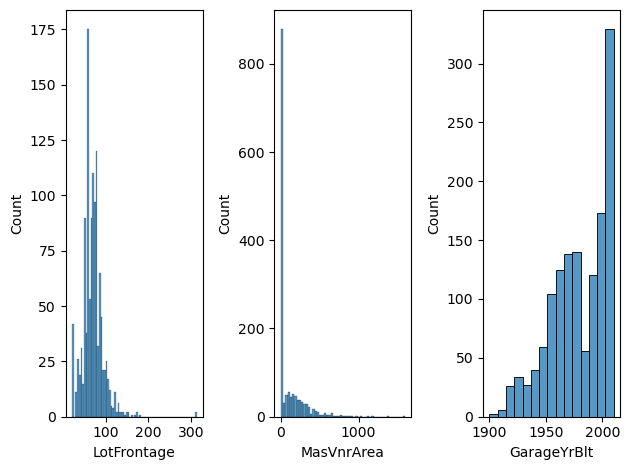

In [8]:
# Histograms for float remaining null columns
float_columns = null_df_train.columns[null_df_train.dtypes == float]
fig,axes = plt.subplots(1,len(float_columns))
for i,ax in enumerate(axes):
    sns.histplot(null_df_train[float_columns[i]],ax=ax)
fig.tight_layout()

In [9]:
# We substitute null values of MasVnrArea and GrageYrBlt with the respective modes
# (some values are predominant)
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(df_train.MasVnrArea.mode()[0])
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna(df_train.MasVnrArea.mode()[0])
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train.GarageYrBlt.mode()[0])
df_test["GarageYrBlt"] = df_test["GarageYrBlt"].fillna(df_train.GarageYrBlt.mode()[0])

# For LotFrontage we choose the median
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train.LotFrontage.median())
df_test["LotFrontage"] = df_test["LotFrontage"].fillna(df_train.LotFrontage.median())

null_df_train = null_df_train.drop(columns=float_columns, axis=1)

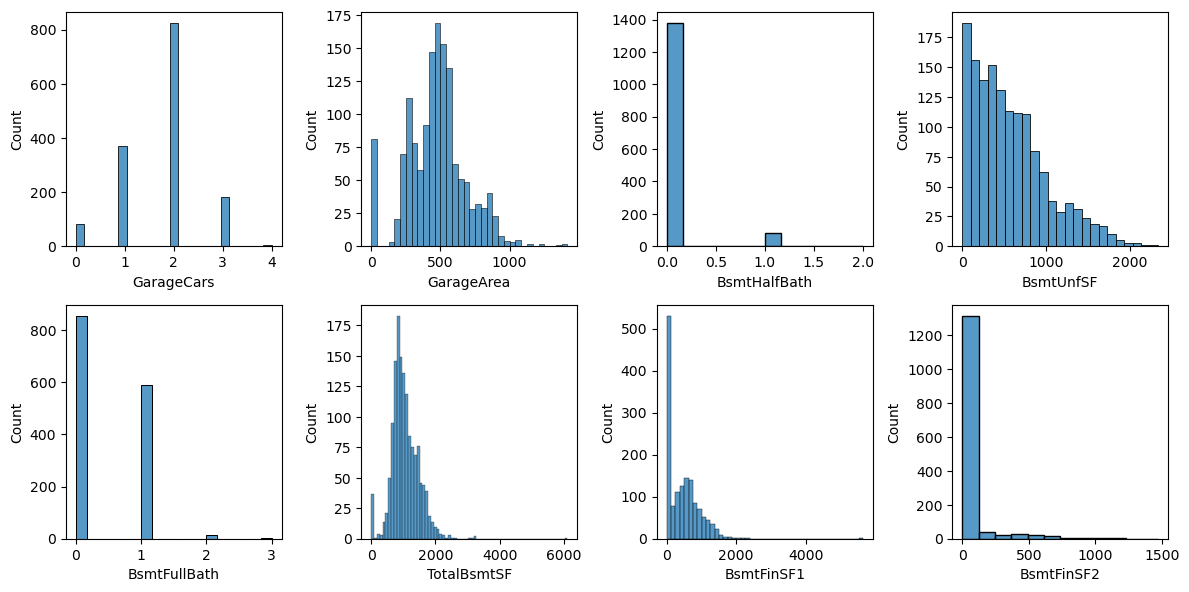

In [10]:
# Lets go with the integers
int_columns = null_df_train.columns[null_df_train.dtypes == int]
fig,axes = plt.subplots(2,int(len(int_columns)/2), figsize=(12,6))
for i,ax in enumerate(axes.reshape(-1)):
    sns.histplot(null_df_train[int_columns[i]],ax=ax)
fig.tight_layout()

In [11]:
# These features concern the basement or garage.
# Likely missing values are due to no garage or basement. Let's fill them with zeros
for col in int_columns:
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

null_df_train = null_df_train.drop(columns=int_columns, axis=1)

In [12]:
# What is left?
for col in null_df_train.columns:
    print(col,Counter(null_df_train[col]))

BsmtFinType2 Counter({'Unf': 1256, 'Rec': 54, 'LwQ': 46, nan: 38, 'BLQ': 33, 'ALQ': 19, 'GLQ': 14})
BsmtFinType1 Counter({'Unf': 430, 'GLQ': 418, 'ALQ': 220, 'BLQ': 148, 'Rec': 133, 'LwQ': 74, nan: 37})
GarageCond Counter({'TA': 1326, nan: 81, 'Fa': 35, 'Gd': 9, 'Po': 7, 'Ex': 2})
Functional Counter({'Typ': 1360, 'Min2': 34, 'Min1': 31, 'Mod': 15, 'Maj1': 14, 'Maj2': 5, 'Sev': 1})
Exterior2nd Counter({'VinylSd': 504, 'MetalSd': 214, 'HdBoard': 207, 'Wd Sdng': 197, 'Plywood': 142, 'CmentBd': 60, 'Wd Shng': 38, 'Stucco': 26, 'BrkFace': 25, 'AsbShng': 20, 'ImStucc': 10, 'Brk Cmn': 7, 'Stone': 5, 'AsphShn': 3, 'Other': 1, 'CBlock': 1})
Electrical Counter({'SBrkr': 1334, 'FuseA': 94, 'FuseF': 27, 'FuseP': 3, 'Mix': 1, nan: 1})
BsmtQual Counter({'TA': 649, 'Gd': 618, 'Ex': 121, nan: 37, 'Fa': 35})
Utilities Counter({'AllPub': 1459, 'NoSeWa': 1})
GarageQual Counter({'TA': 1311, nan: 81, 'Fa': 48, 'Gd': 14, 'Ex': 3, 'Po': 3})
Exterior1st Counter({'VinylSd': 515, 'HdBoard': 222, 'MetalSd': 220,

In [13]:
# There's only 1 missing entry in Electrical, we can fill it with the mode
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')
df_test['Electrical'] = df_test['Electrical'].fillna('SBrkr')

# Garage- columns have 81 nans, Bsmnt columns have 37 or 38 nans
# Again, likely this means there is no garage or basement. Let's fill them with "Nan"
Bsmt = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
Garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in Bsmt+Garage:
    df_train[col] = df_train[col].fillna('Nan')
    df_test[col] = df_test[col].fillna('Nan')

null_df_train = null_df_train.drop(columns=Bsmt+Garage+['Electrical'], axis=1)

In [14]:
# What is left(2)?
for col in null_df_train.columns:
    print(col,Counter(null_df_train[col]))

Functional Counter({'Typ': 1360, 'Min2': 34, 'Min1': 31, 'Mod': 15, 'Maj1': 14, 'Maj2': 5, 'Sev': 1})
Exterior2nd Counter({'VinylSd': 504, 'MetalSd': 214, 'HdBoard': 207, 'Wd Sdng': 197, 'Plywood': 142, 'CmentBd': 60, 'Wd Shng': 38, 'Stucco': 26, 'BrkFace': 25, 'AsbShng': 20, 'ImStucc': 10, 'Brk Cmn': 7, 'Stone': 5, 'AsphShn': 3, 'Other': 1, 'CBlock': 1})
Utilities Counter({'AllPub': 1459, 'NoSeWa': 1})
Exterior1st Counter({'VinylSd': 515, 'HdBoard': 222, 'MetalSd': 220, 'Wd Sdng': 206, 'Plywood': 108, 'CemntBd': 61, 'BrkFace': 50, 'WdShing': 26, 'Stucco': 25, 'AsbShng': 20, 'BrkComm': 2, 'Stone': 2, 'AsphShn': 1, 'ImStucc': 1, 'CBlock': 1})
MSZoning Counter({'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10})
KitchenQual Counter({'TA': 735, 'Gd': 586, 'Ex': 100, 'Fa': 39})
SaleType Counter({'WD': 1267, 'New': 122, 'COD': 43, 'ConLD': 9, 'ConLI': 5, 'ConLw': 5, 'CWD': 4, 'Oth': 3, 'Con': 2})


In [15]:
# We'll go with the mode here
for col in null_df_train.columns:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    df_test[col] = df_test[col].fillna(df_train[col].mode()[0])

del null_df_train

In [ ]:
# We should be done
print((df_train.isnull().any()).any())
print((df_test.isnull().any()).any())

False
False


### <a id='toc1_1_3_'></a>[Feature engineering - floats](#toc0_)

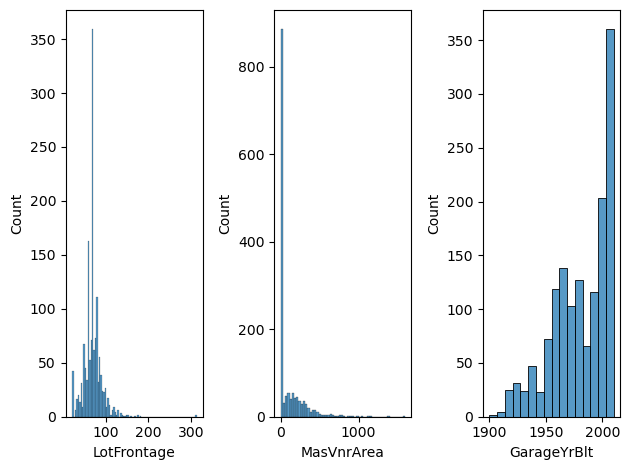

In [ ]:
# Plot histograms for float columns
float_columns = df_train.columns[df_train.dtypes == float]
fig,axes = plt.subplots(1,len(float_columns))
for i,ax in enumerate(axes):
    sns.histplot(df_train[float_columns[i]],ax=ax)
fig.tight_layout()

In [18]:
# Convert GarageYrBlt to age
from datetime import datetime

def convert_to_age(val, now=datetime.now().year):
    return int(now-val)

df_train['GarageYrBlt'] = df_train['GarageYrBlt'].apply(convert_to_age)

In [ ]:
# Apply standard scaling
from sklearn.preprocessing import StandardScaler

columns_to_scale = float_columns
scaler = StandardScaler()
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])

### <a id='toc1_1_4_'></a>[Feature engineering - integers](#toc0_)

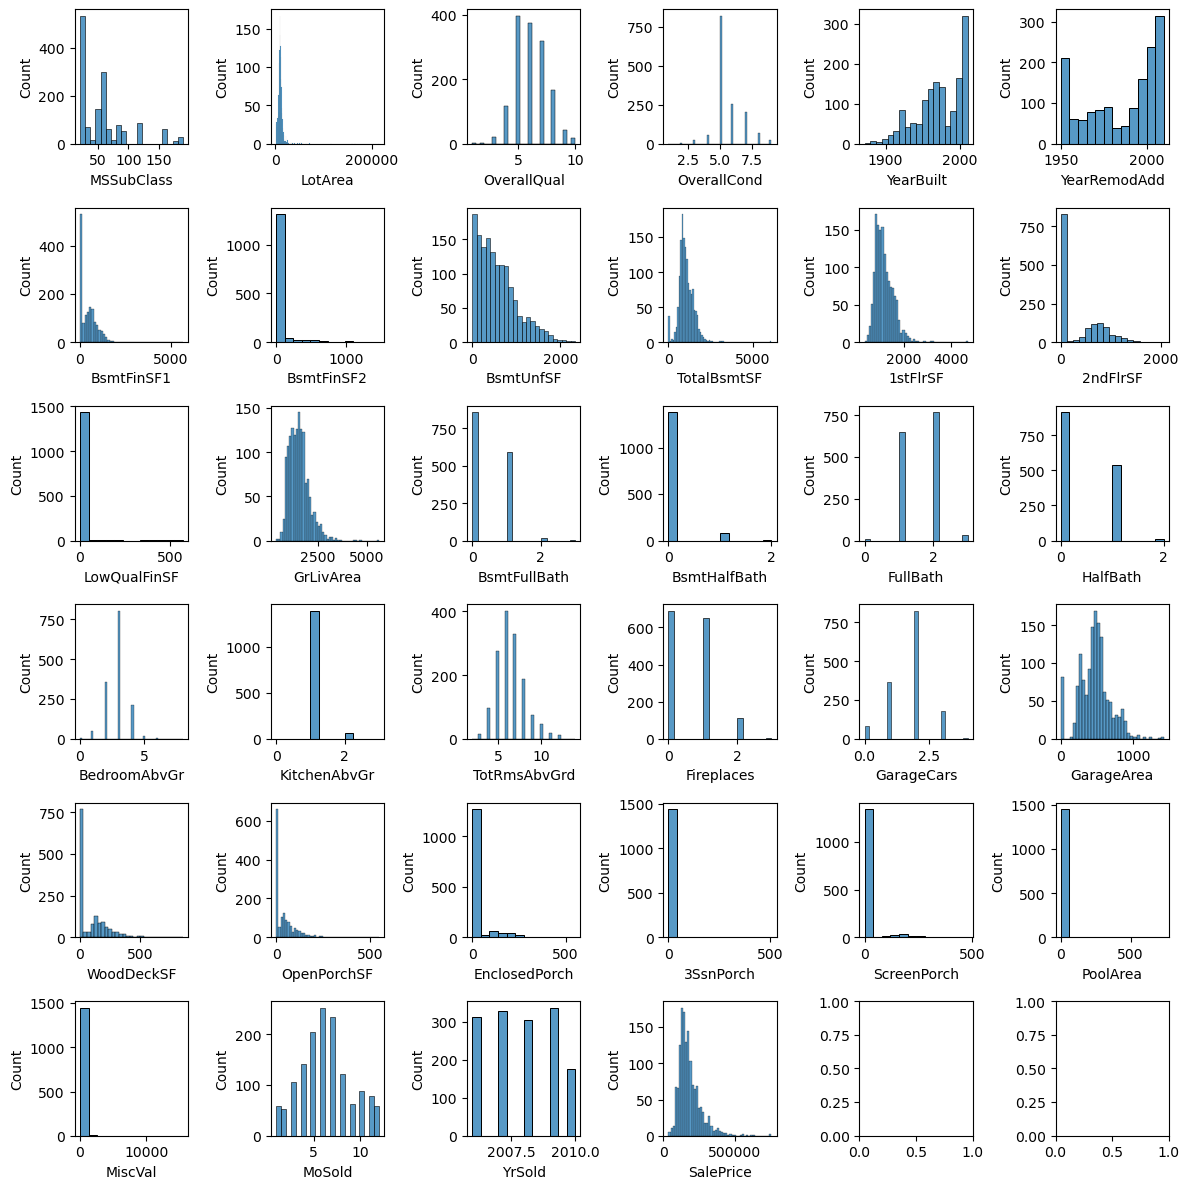

In [ ]:
# Plot histograms for integer values
int_columns = df_train.columns[df_train.dtypes == int]
n_cols = 6
n_rows = math.ceil(len(int_columns) / n_cols)
fig,axes = plt.subplots(n_cols,n_rows,figsize=(12,12))
axes = axes.flatten()
for i,col in enumerate(int_columns):
    sns.histplot(df_train[col],ax=axes[i])
fig.tight_layout()

In [21]:
# Convert years to age
for Yr_col in ["YearBuilt","YearRemodAdd","YrSold"]:
    df_train[Yr_col] = df_train[Yr_col].apply(convert_to_age)
    df_test[Yr_col] = df_test[Yr_col].apply(convert_to_age)

In [22]:
# Let's see some suspicious columns
suspicious_columns = ["BsmtFinSF2","LowQualFinSF","KitchenAbvGr","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"] + ["BsmtHalfBath","HalfBath","BsmtFullBath","FullBath"] + ["Fireplaces"]
for col in suspicious_columns:
    print(col, Counter(df_train[col]))

BsmtFinSF2 Counter({0: 1293, 180: 5, 374: 3, 93: 2, 712: 2, 41: 2, 279: 2, 147: 2, 294: 2, 391: 2, 539: 2, 96: 2, 551: 2, 480: 2, 182: 2, 468: 2, 287: 2, 117: 2, 64: 2, 290: 2, 469: 2, 32: 1, 668: 1, 486: 1, 491: 1, 506: 1, 362: 1, 169: 1, 869: 1, 150: 1, 670: 1, 28: 1, 1080: 1, 181: 1, 768: 1, 215: 1, 208: 1, 441: 1, 184: 1, 306: 1, 580: 1, 690: 1, 692: 1, 228: 1, 125: 1, 1063: 1, 620: 1, 175: 1, 820: 1, 1474: 1, 264: 1, 479: 1, 232: 1, 380: 1, 544: 1, 258: 1, 121: 1, 531: 1, 344: 1, 713: 1, 210: 1, 311: 1, 1120: 1, 165: 1, 532: 1, 495: 1, 174: 1, 1127: 1, 139: 1, 202: 1, 645: 1, 123: 1, 219: 1, 606: 1, 612: 1, 132: 1, 336: 1, 35: 1, 499: 1, 723: 1, 119: 1, 40: 1, 239: 1, 80: 1, 472: 1, 1057: 1, 127: 1, 630: 1, 128: 1, 377: 1, 764: 1, 345: 1, 1085: 1, 435: 1, 823: 1, 500: 1, 324: 1, 634: 1, 411: 1, 841: 1, 1061: 1, 466: 1, 396: 1, 354: 1, 149: 1, 193: 1, 273: 1, 465: 1, 400: 1, 682: 1, 557: 1, 230: 1, 106: 1, 791: 1, 240: 1, 547: 1, 177: 1, 108: 1, 600: 1, 492: 1, 211: 1, 168: 1, 1031

In [ ]:
# We can map values to binary
for col in suspicious_columns:
    if col=="KitchenAbvGr" or col=="FullBath":
        df_train[col] = df_train[col].apply(lambda x: int(x>1))
        df_test[col] = df_test[col].apply(lambda x: int(x>1))
    elif col=="Fireplaces":
        df_train[col]=df_train[col].replace(to_replace=3,value=2)
        df_test[col]=df_test[col].replace(to_replace=3,value=2)
    else:
        df_train[col] = df_train[col].apply(lambda x: int(x>0))
        df_test[col] = df_test[col].apply(lambda x: int(x>0))

# Print counter
for col in suspicious_columns:
    print(col, Counter(df_train[col]))

BsmtFinSF2 Counter({0: 1293, 1: 167})
LowQualFinSF Counter({0: 1434, 1: 26})
KitchenAbvGr Counter({0: 1393, 1: 67})
EnclosedPorch Counter({0: 1252, 1: 208})
3SsnPorch Counter({0: 1436, 1: 24})
ScreenPorch Counter({0: 1344, 1: 116})
PoolArea Counter({0: 1453, 1: 7})
MiscVal Counter({0: 1408, 1: 52})
BsmtHalfBath Counter({0: 1378, 1: 82})
HalfBath Counter({0: 913, 1: 547})
BsmtFullBath Counter({0: 856, 1: 604})
FullBath Counter({1: 801, 0: 659})
Fireplaces Counter({0: 690, 1: 650, 2: 120})


In [24]:
# Drop the columns showing too much imbalance
columns_todrop = ["LowQualFinSF","3SsnPorch","PoolArea"]
df_train = df_train.drop(columns=columns_todrop,axis=1)
df_test = df_test.drop(columns=columns_todrop,axis=1)

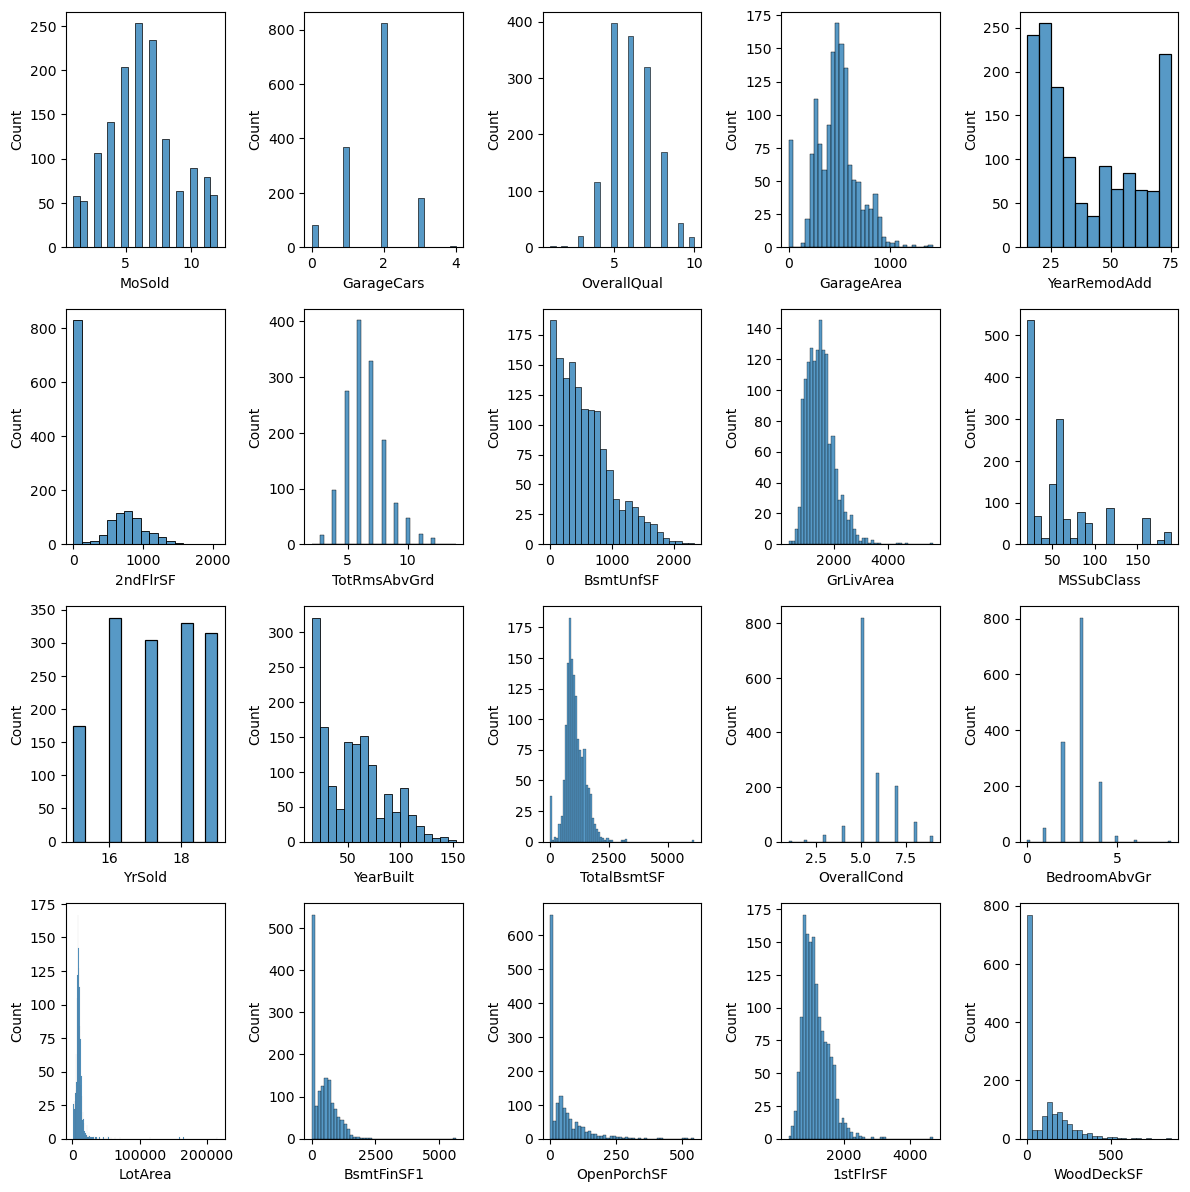

In [ ]:
# Display remaining columns
int_columns = set(int_columns).difference(set(suspicious_columns).union({"SalePrice"}))
n_cols = 4
n_rows = math.ceil(len(int_columns) / n_cols)
fig,axes = plt.subplots(n_cols,n_rows,figsize=(12,12))
axes = axes.flatten()
for i,col in enumerate(int_columns):
    sns.histplot(df_train[col],ax=axes[i])
fig.tight_layout()

In [ ]:
# Standard scaling
columns_to_scale = list(int_columns)
scaler = StandardScaler()
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])

### <a id='toc1_1_5_'></a>[Feature engineering - objects](#toc0_)

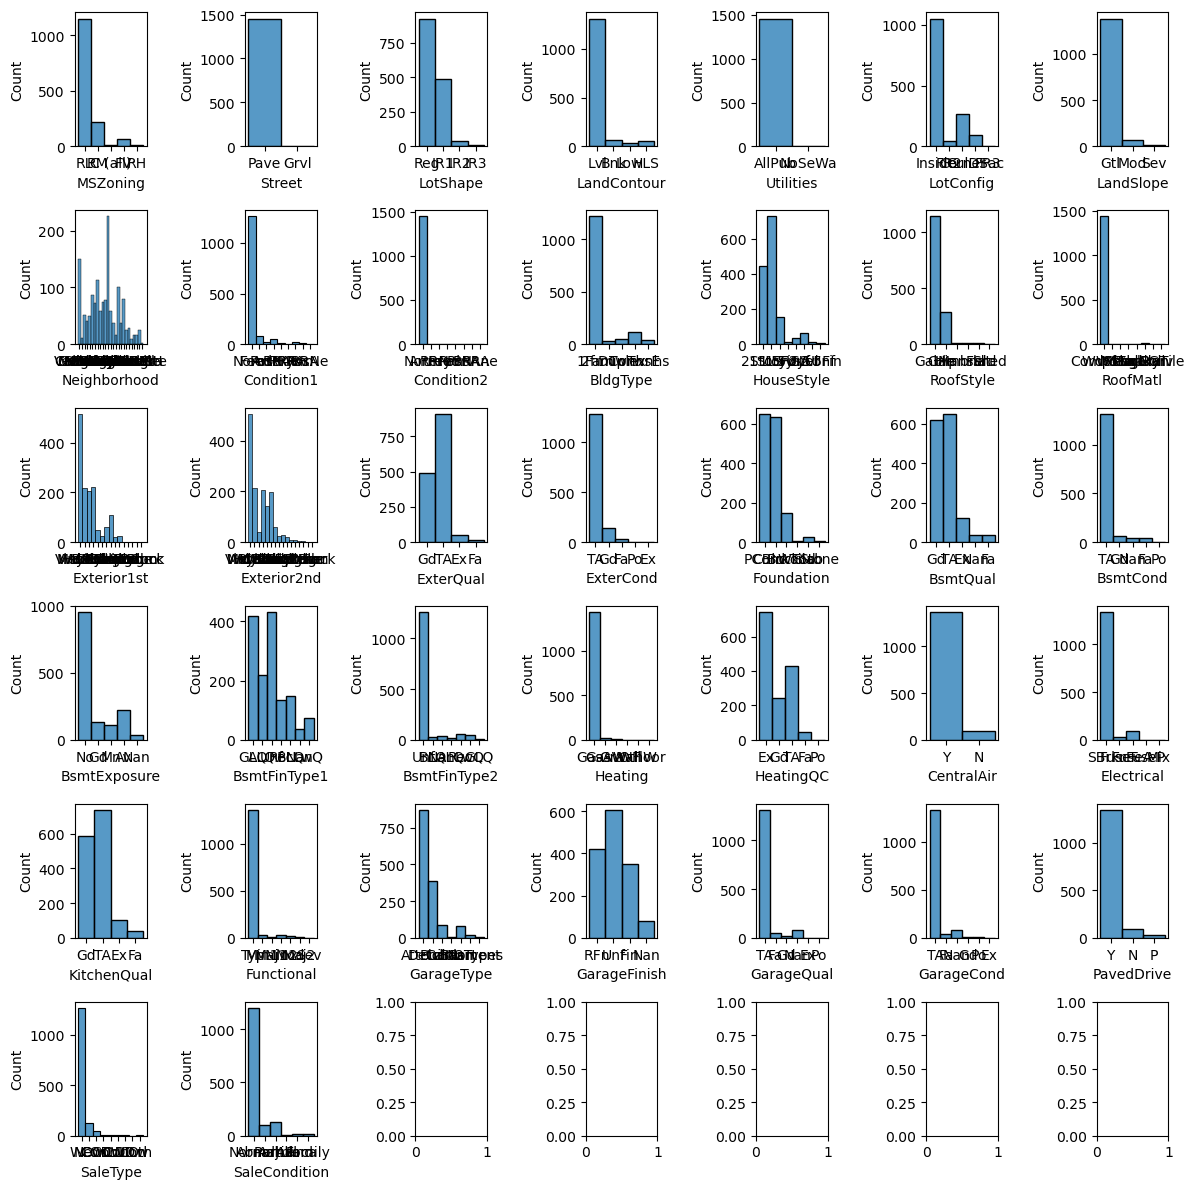

In [ ]:
# Plot histograms for object columns
obj_columns = df_train.columns[df_train.dtypes == object]
n_cols = 6
n_rows = math.ceil(len(obj_columns) / n_cols)
fig,axes = plt.subplots(n_cols,n_rows,figsize=(12,12))
axes = axes.flatten()
for i,col in enumerate(obj_columns):
    sns.histplot(df_train[col],ax=axes[i])
fig.tight_layout()

In [28]:
# Let's see some suspicious columns
suspicious_columns = obj_columns.copy()
for col in suspicious_columns:
    print(col, Counter(df_train[col]))

MSZoning Counter({'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10})
Street Counter({'Pave': 1454, 'Grvl': 6})
LotShape Counter({'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10})
LandContour Counter({'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36})
Utilities Counter({'AllPub': 1459, 'NoSeWa': 1})
LotConfig Counter({'Inside': 1052, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4})
LandSlope Counter({'Gtl': 1382, 'Mod': 65, 'Sev': 13})
Neighborhood Counter({'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'StoneBr': 25, 'SWISU': 25, 'MeadowV': 17, 'Blmngtn': 17, 'BrDale': 16, 'Veenker': 11, 'NPkVill': 9, 'Blueste': 2})
Condition1 Counter({'Norm': 1260, 'Feedr': 81, 'Artery': 48, 'RRAn': 26, 'PosN': 19, 'RRAe': 11, 'PosA': 8, 'RRNn': 5, 'RRNe': 2})
Condition2 Counter({'Norm': 1445, '

In [29]:
# Drop columns with too much imbalance
columns_todrop = ["Street","Condition2","RoofMatl","Heating","Utilities"]
df_train = df_train.drop(columns=columns_todrop,axis=1)
df_test = df_test.drop(columns=columns_todrop,axis=1)

suspicious_columns = list( set(suspicious_columns) - set(columns_todrop) )

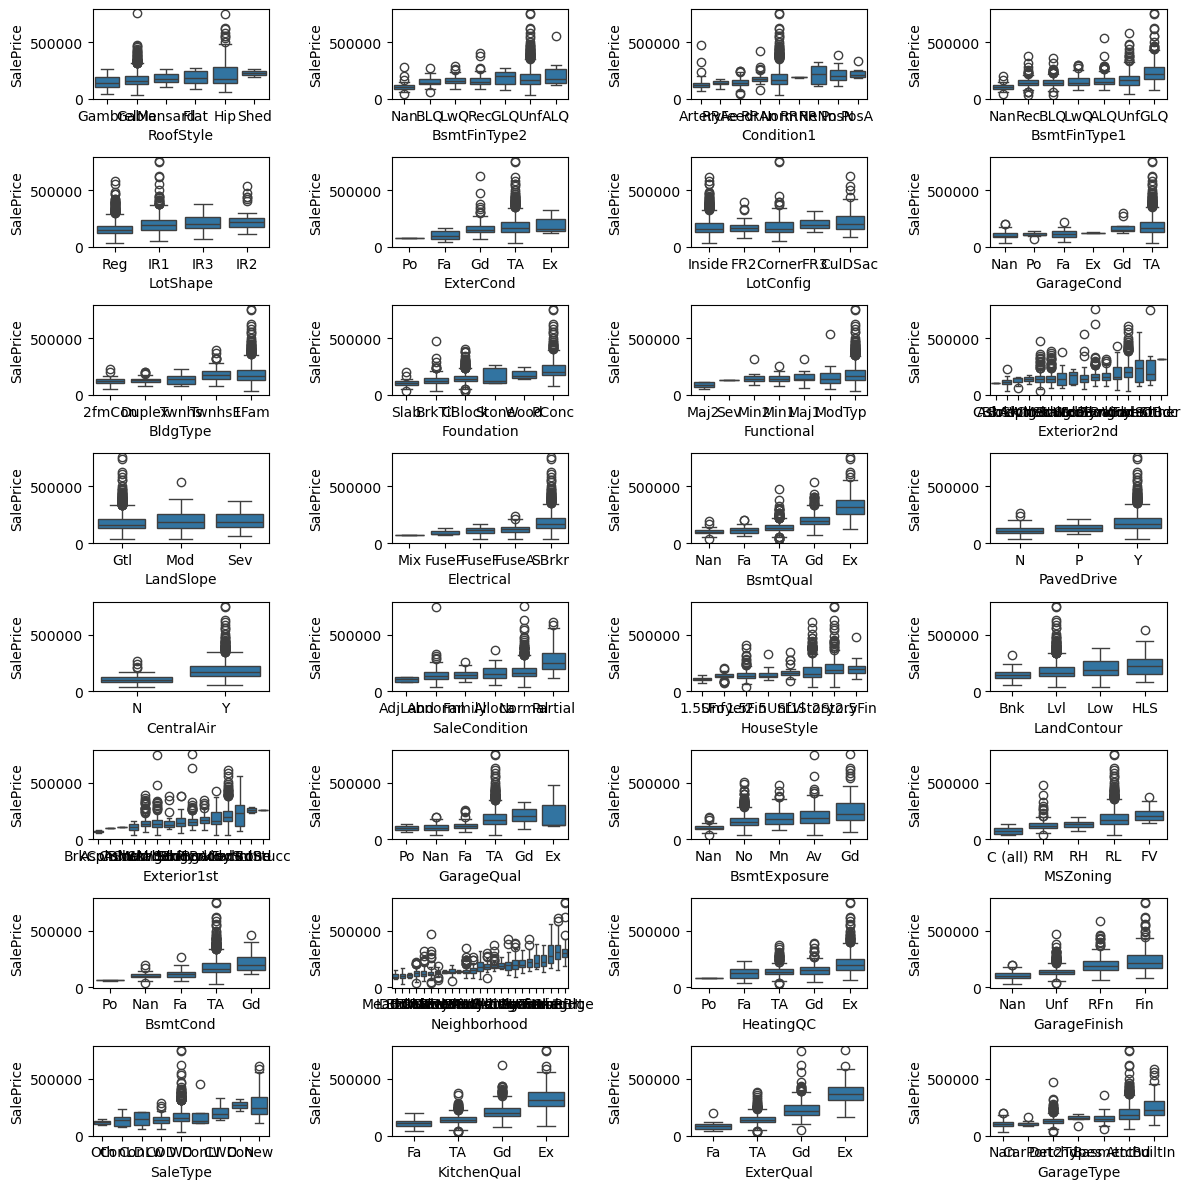

In [30]:
# Distinguish between ordinal and non ordinal
n_cols = 4
n_rows = math.ceil(len(suspicious_columns) / n_cols)
fig,axes = plt.subplots(n_rows,n_cols,figsize=(12,12))
axes = axes.flatten()
for i,col in enumerate(suspicious_columns):
    mean_prices = df_train.groupby(col)['SalePrice'].mean().sort_values()
    sns.boxplot(x=col, y='SalePrice', data=df_train, order=mean_prices.index,ax=axes[i])
    ax.set_title(col)
fig.tight_layout()
plt.show()

In [31]:
# Some custom transformations
df_train["LandSlope"] = df_train["LandSlope"].replace(to_replace = 'Sev',value='Mod') 
df_test["LandSlope"] = df_test["LandSlope"].replace(to_replace = 'Sev',value='Mod') 

df_train["Condition1"] = df_train["Condition1"].apply(lambda x: x if x=='Norm' else 'NotNorm') 
df_test["Condition1"] = df_test["Condition1"].apply(lambda x: x if x=='Norm' else 'NotNorm') 

# -Cond columns: group together (Po,Fa,Nan), (Gd,Ex)
def cond_class_grouper(val):
    if val in ["Po","Fa","Nan"]:
        return "Bad"
    elif val in ["Gd","Ex"]:
        return "Good"
    else:
        return val
    
cond_cols = ["BsmtCond","GarageQual","GarageCond","ExterCond"]
for col in cond_cols:
    df_train[col] = df_train[col].apply(cond_class_grouper)
    df_test[col] = df_test[col].apply(cond_class_grouper)

In [32]:
# Non ordinal features for which to discard minor categories
non_ordinal = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']

def minor_class_grouper(df_stats, df_modify, columns, threshold=40):
    
    for col in columns:
        value_counts = df_stats[col].value_counts()
        df_modify[col] = df_modify[col].apply(lambda x: "Others" if value_counts.get(x,0)<threshold else x)

    pass

minor_class_grouper(df_stats=df_train,df_modify=df_train,columns=non_ordinal)
minor_class_grouper(df_stats=df_train,df_modify=df_test,columns=non_ordinal)

In [ ]:
# One hot encoding and ordinal encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Ordinal features are the other ones
obj_columns = df_train.columns[df_train.dtypes == object]
ordinal = list(set(obj_columns) - set(non_ordinal))

# Encoders
ordinal_encoder = OrdinalEncoder(categories='auto',dtype=int)
onehot_encoder = OneHotEncoder(sparse_output=False,dtype=int)

df_train[ordinal] = ordinal_encoder.fit_transform(df_train[ordinal])
df_test[ordinal] = ordinal_encoder.transform(df_test[ordinal])

onehot_encoded_train = onehot_encoder.fit_transform(df_train[non_ordinal])
feature_names = onehot_encoder.get_feature_names_out(non_ordinal)
onehot_df_train = pd.DataFrame(onehot_encoded_train, columns=feature_names,index=df_train.index)
df_train = df_train.drop(columns=non_ordinal,axis=1)
df_train = pd.concat([df_train,onehot_df_train],axis=1)

onehot_encoded_test = onehot_encoder.transform(df_test[non_ordinal])
onehot_df_test = pd.DataFrame(onehot_encoded_test,columns=feature_names,index=df_test.index)
df_test = df_test.drop(columns=non_ordinal,axis=1)
df_test = pd.concat([df_test,onehot_df_test],axis=1)

print(df_train.shape, df_test.shape)
print(df_train.columns)
df_train.head()

(1460, 134) (1459, 133)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'GarageType_Nan', 'GarageType_Others', 'SaleType_COD', 'SaleType_New',
       'SaleType_Others', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_Normal', 'SaleCondition_Others',
       'SaleCondition_Partial'],
      dtype='object', length=134)


,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,GarageType_Nan,GarageType_Others,SaleType_COD,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0,0.651479,-0.517200,-1.050994,-0.878668,0.514104,2,...,0,0,0,0,0,1,0,1,0,0
1,-0.872563,0.460320,-0.091886,0,-0.071836,2.179628,-0.156734,0.429577,-0.570750,3,...,0,0,0,0,0,1,0,1,0,0
2,0.073375,-0.084636,0.073480,0,0.651479,-0.517200,-0.984752,-0.830215,0.325915,2,...,0,0,0,0,0,1,0,1,0,0
3,0.309859,-0.447940,-0.096897,0,0.651479,-0.517200,1.863632,0.720298,-0.570750,3,...,0,0,0,0,0,1,1,0,0,0
4,0.073375,0.641972,0.375148,0,1.374795,-0.517200,-0.951632,-0.733308,1.366489,2,...,0,0,0,0,0,1,0,1,0,0


## <a id='toc1_2_'></a>[Correlations and dimensionality reduction](#toc0_)

In [34]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

In [35]:
# Drop from dataset SalePrice
df_train_target = df_train['SalePrice']
df_train = df_train.drop(columns=['SalePrice'],axis=1)

GarageCars	GarageArea	GarageQual	GarageCond	PavedDrive	CentralAir_Y	Electrical_SBrkr	ExterCond	BsmtCond	HouseStyle_1Story	RoofStyle_Hip	BsmtFinSF1	BsmtFullBath	WoodDeckSF	MSZoning_RL	GarageType_Attchd	Fireplaces	TotalBsmtSF	1stFlrSF	MasVnrArea	Neighborhood_NoRidge	LotShape_IR1	LotConfig_CulDSac	HalfBath	2ndFlrSF	HouseStyle_2Story	BedroomAbvGr	GrLivArea	TotRmsAbvGrd	Neighborhood_CollgCr	Exterior1st_VinylSd	Exterior2nd_VinylSd	SaleType_New	SaleCondition_Partial	OpenPorchSF	Neighborhood_NridgHt	FullBath	OverallQual	Foundation_PConc	LotConfig_Corner	LotFrontage	BldgType_1Fam	LotShape_Others	Neighborhood_Gilbert	GarageType_BuiltIn	BsmtFinType1	BsmtUnfSF	LandContour_HLS	Neighborhood_Crawfor	MoSold	YrSold	LotConfig_Others	BsmtFinType2	Functional_Typ	ExterQual	KitchenQual	HeatingQC	Foundation_CBlock	BsmtQual	YearRemodAdd	YearBuilt	GarageYrBlt	GarageFinish	GarageType_Detchd	Exterior1st_Wd Sdng	Exterior2nd_Wd Sdng	MSZoning_RM	Neighborhood_OldTown	EnclosedPorch	Foundation_BrkTil	RoofStyle_Gable	N

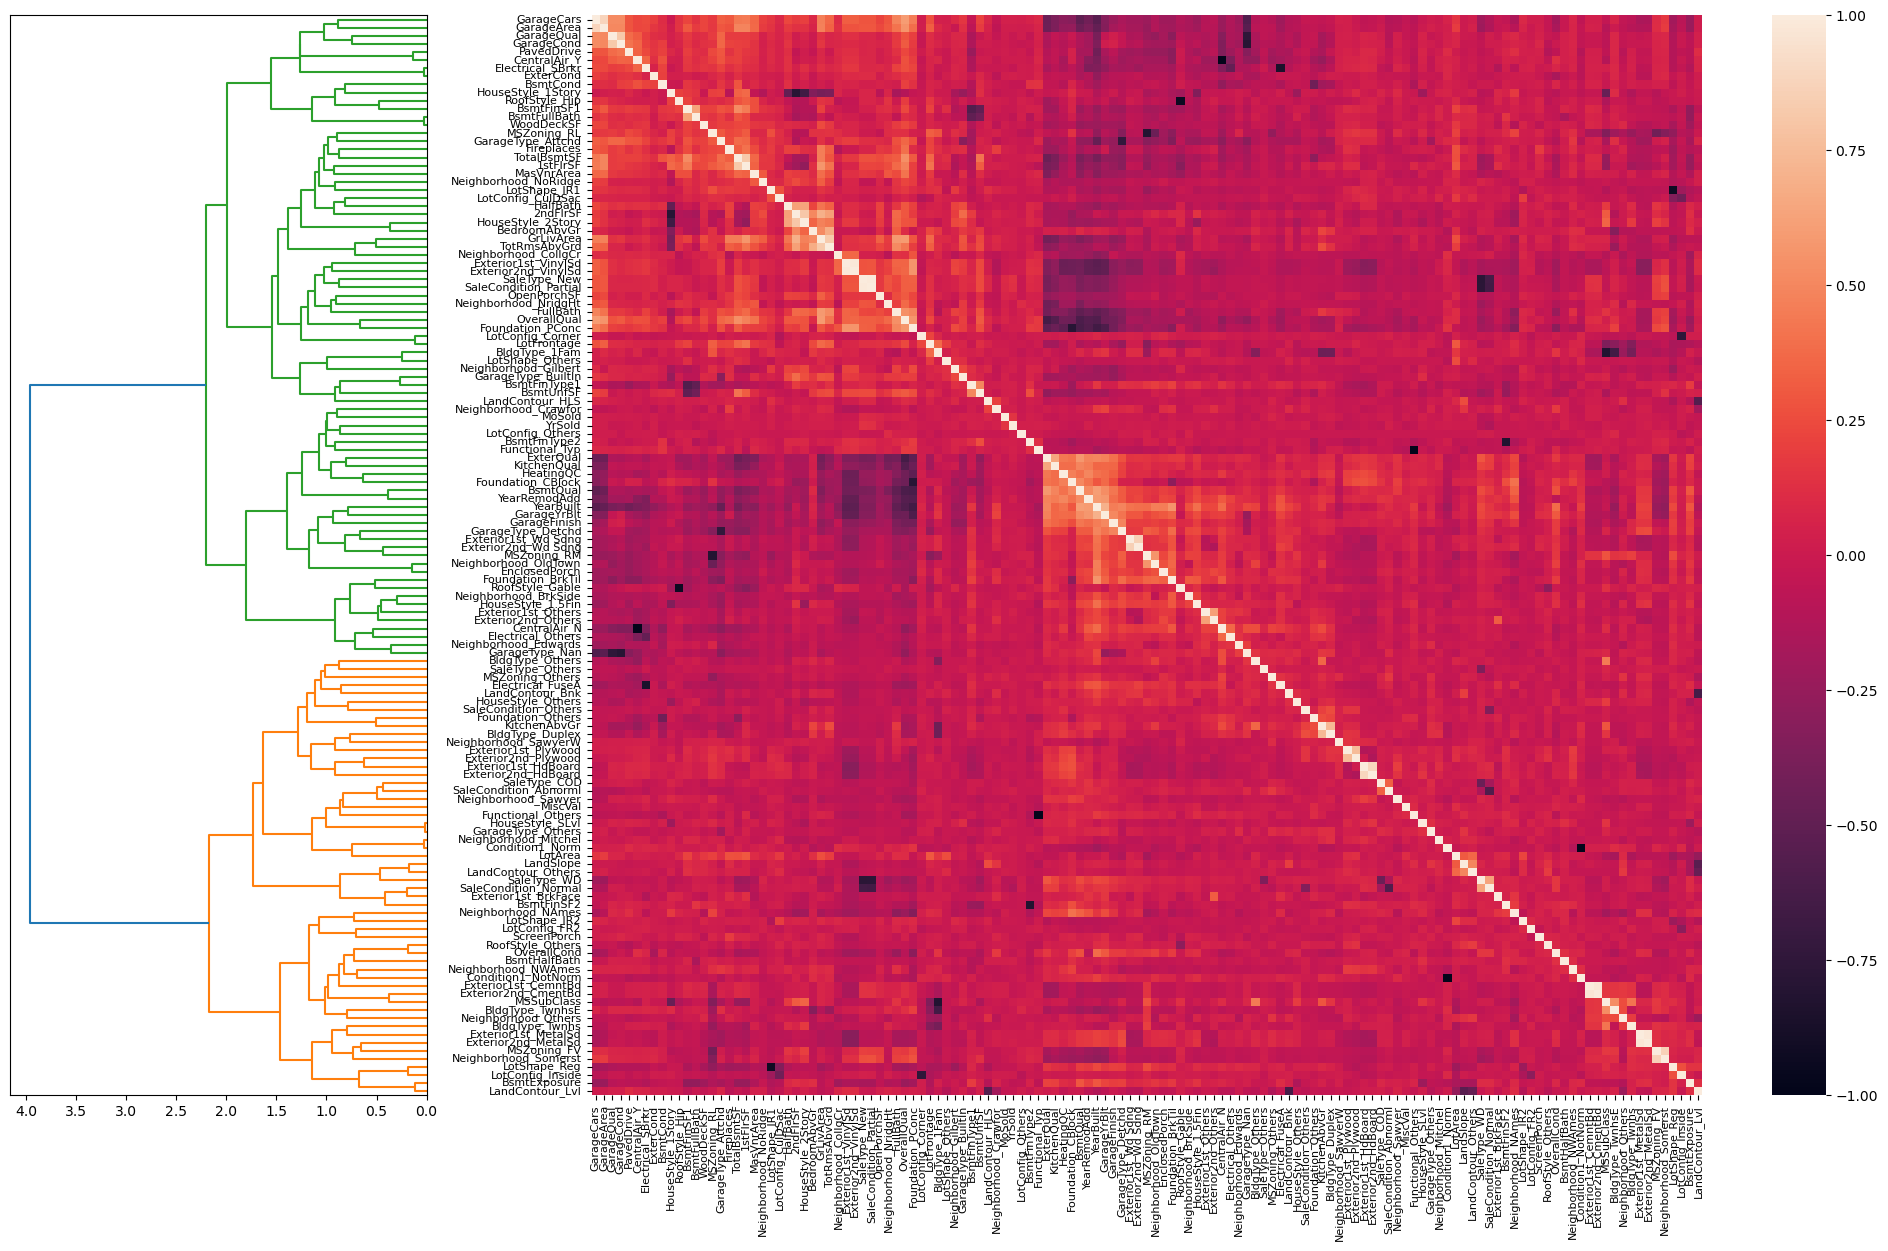

In [ ]:
# Compute correlation matrix
corr_matrix = df_train.corr()

# Perform agglomerative clustering of features based on correlation
z = hierarchy.linkage(pdist(df_train.T,metric='correlation'),method='ward')
# Get ordered leaves
features_ordered = hierarchy.leaves_list(z) 
# Reorder the correlation matrix
corr_matrix = corr_matrix.iloc[features_ordered,features_ordered]
print(*corr_matrix.columns,sep='\t')

# Plot
fig = plt.figure(figsize=(20,16))

# Add dendrogram
gs = plt.GridSpec(2, 2, width_ratios=[0.3, 1], height_ratios=[0.3, 1])
ax_dendr_left = fig.add_subplot(gs[1, 0])
ax_heatmap = fig.add_subplot(gs[1, 1])
hierarchy.dendrogram(z, ax=ax_dendr_left, orientation='left')
ax_dendr_left.set_yticks([])

# Heatmap
sns.heatmap(corr_matrix, ax=ax_heatmap,xticklabels=corr_matrix.columns,yticklabels=corr_matrix.index,vmin=-1, vmax=1)
ax_heatmap.set_xticklabels(corr_matrix.columns,fontsize=8)
ax_heatmap.set_yticklabels(corr_matrix.index,fontsize=8)
fig.tight_layout()
plt.savefig('Figures/feat_corr.pdf')
plt.show()

<BarContainer object of 133 artists>

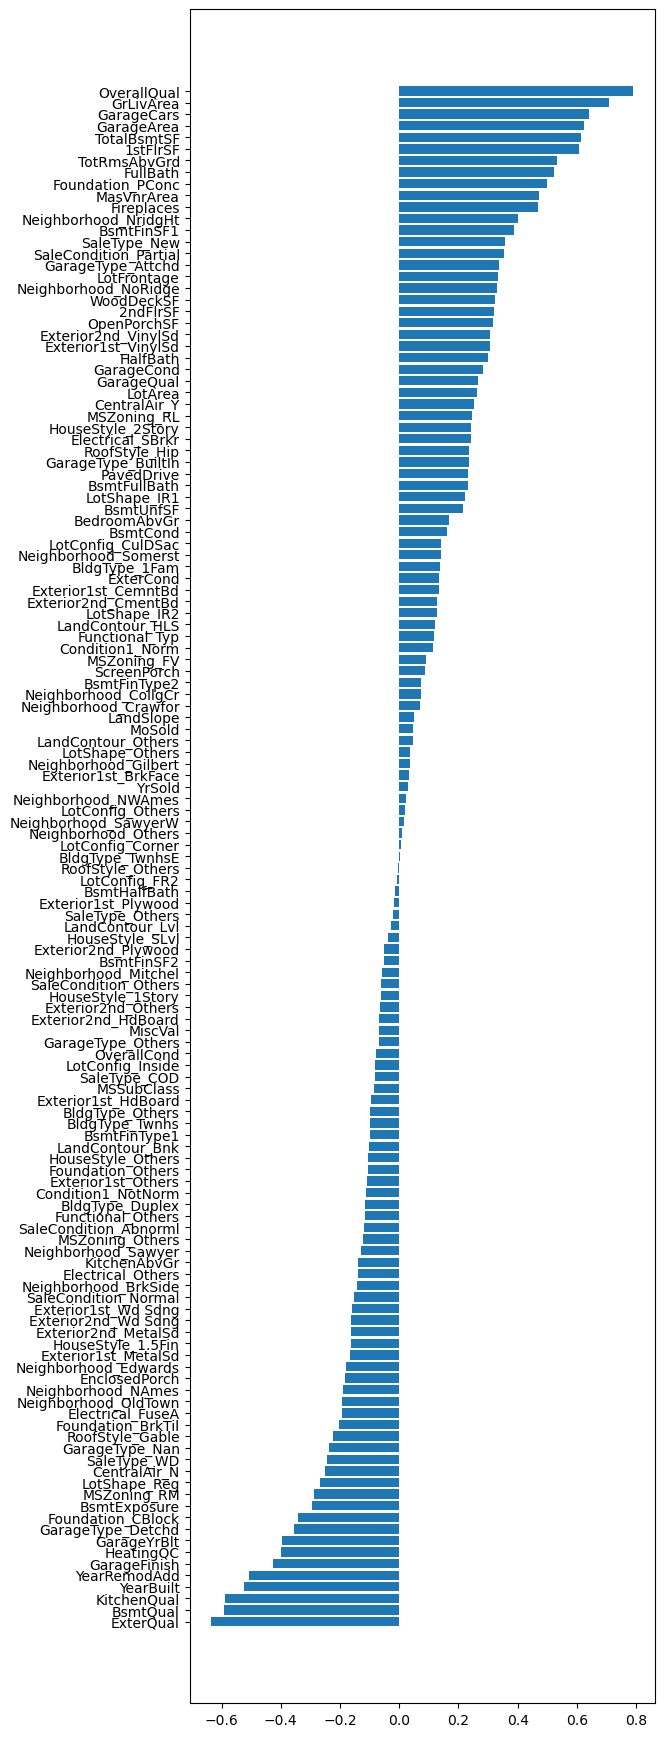

In [37]:
# Compute correlation with target
df_train_full = pd.concat([df_train,df_train_target],axis=1)
corr_series = df_train_full.corr().loc['SalePrice',:]
corr_series = corr_series.drop(labels=['SalePrice'])
corr_series = corr_series.sort_values()
fig,ax = plt.subplots(figsize=(6,22))
ax.barh(y=corr_series.index, width=corr_series.values)

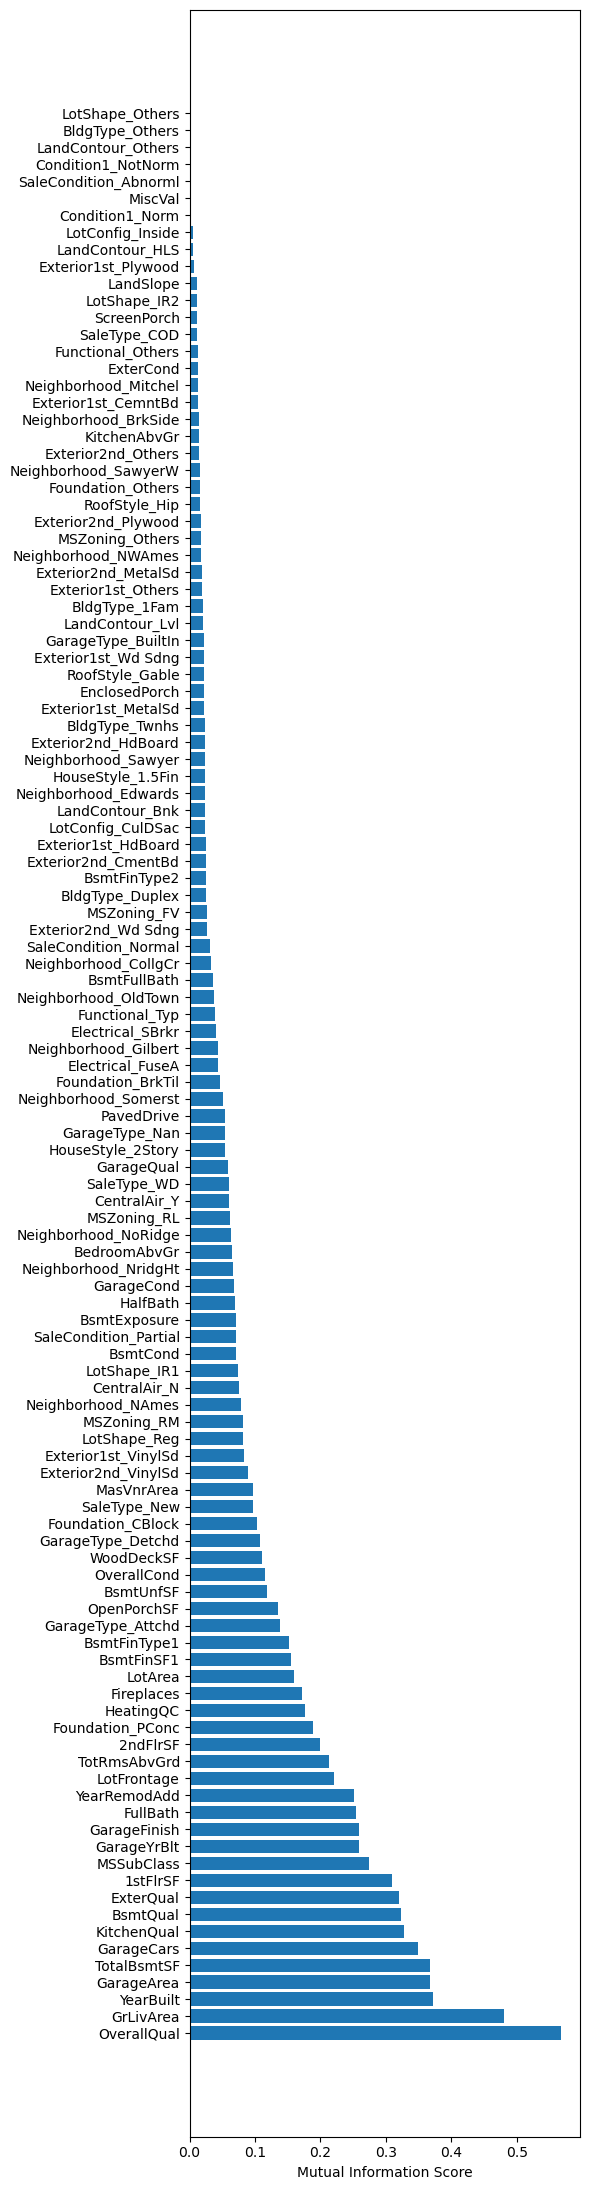

In [70]:
# Here we adopt mutual information regression in order to perform feature selection

from sklearn.feature_selection import mutual_info_regression

def select_features_mutual_info(X, y, n_features=None, threshold=None):
    """
    Select features based on mutual information with respect to the target variable.
    """
    
    # Define function
    mi_func = mutual_info_regression
    
    # Calculate mutual information scores
    mi_scores = mi_func(X, y)
    
    # Create dictionary of feature names and scores
    feature_scores = dict(zip(X.columns, mi_scores))
    
    # Sort
    sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Select reduced number of features
    if n_features is not None:
        selected_features = [f[0] for f in sorted_features[:n_features]]
    elif threshold is not None:
        selected_features = [f[0] for f in sorted_features if f[1] >= threshold]
    else:
        selected_features = [f[0] for f in sorted_features]
    
    selected_features_scores = {key:val for key,val in sorted_features if key in selected_features}
    selected_features_scores = dict(sorted(selected_features_scores.items(), key=lambda x: x[1], reverse=True))

    return selected_features_scores

selected_features_scores = select_features_mutual_info(df_train,df_train_target)
    
# Plot scores    
fig,ax = plt.subplots(figsize=(6,22))
ax.barh(y=selected_features_scores.keys(), width=selected_features_scores.values())
plt.xlabel('Mutual Information Score')
plt.tight_layout()
plt.savefig('Figures/MI.pdf')
plt.show()

In [ ]:
# Select features based on MI score threshold
print(df_train.shape[1])
selected_features = list(select_features_mutual_info(df_train,df_train_target,threshold=0.0025).keys())
print(len(selected_features))

133
114


In [ ]:
df_train = df_train[selected_features]
df_test = df_test[selected_features]

## <a id='toc1_3_'></a>[Model - sklearn regressors](#toc0_)
Here we train and evaluate a selection of Regressors from sklearn

In [41]:
import joblib

N_CORES = joblib.cpu_count(only_physical_cores=True)
print(f"Number of physical cores: {N_CORES}")
print(f"Number of samples: {df_train.shape[0]}")

Number of physical cores: 4
Number of samples: 1460


In [42]:
# Prepare training data
X = df_train.values
y = df_train_target.values
print(X.shape,y.shape)

(1460, 114) (1460,)


In [ ]:
# We use GridSearchCV to search over 4 models and combinations of their hyperparameters
# Chosen models are:
# -a simple linear regression with elastic net regularization (allowing to interpolate between L1 & L2 norms)
# -three ensembles of decision trees: RandomForestRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
# Other models were previously tested and then removed due to inferior performance

from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold

models = {
    "ElasticNet": ElasticNet(
        random_state=0
    ),
    #"SVR": SVR(
    #),
    "RandomForest": RandomForestRegressor(
        random_state=0, n_jobs=N_CORES, criterion="squared_error"
    ),
    "HistGradientBoosting": HistGradientBoostingRegressor(
        random_state=0, early_stopping=False, loss="squared_error", max_iter=500
    ),
    "AdaBoost": AdaBoostRegressor(
        random_state=0
    )
}
param_grids = {
    "ElasticNet": {"alpha": [0.05,0.1,0.5,1.],
                   "l1_ratio": [0.05,0.1,0.5,0.9]},
    #"SVR": {"degree": [2,3],
    #        "C": [0.25,0.5,1.,100],
    #        "epsilon": [0.01,0.1,1.]},
    "RandomForest": {'n_estimators': [25,50,100],
                        'max_depth': [None,5,10,100],
                        'min_samples_split': [2,5,10],
                        'max_features': [.3,.5,.7,1.]},
    "HistGradientBoosting": {  "max_leaf_nodes": [10,31,None],
                               "min_samples_leaf": [5,10,20],
                               "max_features": [.3,.5,.7,1.]},
    "AdaBoost": {"n_estimators": [25,50,100],
                "learning_rate": [.1,1.,10.],
                "loss": ['linear','square']}
}
cv = KFold(n_splits=5, shuffle=True, random_state=0)

results = []
for name, model in models.items():
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        return_train_score=True,
        cv=cv,
        verbose=2
    ).fit(X, y)
    results_ = {"model": name,
              "cv_results": pd.DataFrame(grid_search.cv_results_),
              "grid_search": grid_search}
    results.append(results_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..........................alpha=0.05, l1_ratio=0.05; total time=   0.2s
[CV] END ..........................alpha=0.05, l1_ratio=0.05; total time=   0.1s
[CV] END ..........................alpha=0.05, l1_ratio=0.05; total time=   0.1s
[CV] END ..........................alpha=0.05, l1_ratio=0.05; total time=   0.1s
[CV] END ..........................alpha=0.05, l1_ratio=0.05; total time=   0.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.05, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.05, 

In [ ]:
# Display the results
for i,results_ in enumerate(results):
    print(results_['model'],', index:',i)
    cv_results_ = results_['cv_results']
    rank1_cv_results_ = pd.DataFrame(cv_results_[cv_results_['rank_test_score']==1])[
        ["params","mean_test_score","std_test_score","mean_train_score","std_train_score"]]
    display(rank1_cv_results_)

ElasticNet , index: 0


,params,mean_test_score,std_test_score,mean_train_score,std_train_score
7,"{'alpha': 0.1, 'l1_ratio': 0.9}",0.834169,0.059149,0.874308,0.010265


RandomForest , index: 1


,params,mean_test_score,std_test_score,mean_train_score,std_train_score
2,"{'max_depth': None, 'max_features': 0.3, 'min_...",0.880889,0.019212,0.981067,0.001183
110,"{'max_depth': 100, 'max_features': 0.3, 'min_s...",0.880889,0.019212,0.981067,0.001183


HistGradientBoosting , index: 2


,params,mean_test_score,std_test_score,mean_train_score,std_train_score
9,"{'max_features': 0.5, 'max_leaf_nodes': 10, 'm...",0.897596,0.015704,0.997937,0.0001


AdaBoost , index: 3


,params,mean_test_score,std_test_score,mean_train_score,std_train_score
11,"{'learning_rate': 1.0, 'loss': 'square', 'n_es...",0.812787,0.008758,0.870232,0.011246


In [55]:
# Dump the best model: HistGradientBoosting
import joblib

best_model = results[2]['grid_search'].best_estimator_
joblib.dump(best_model,"best_model.joblib")

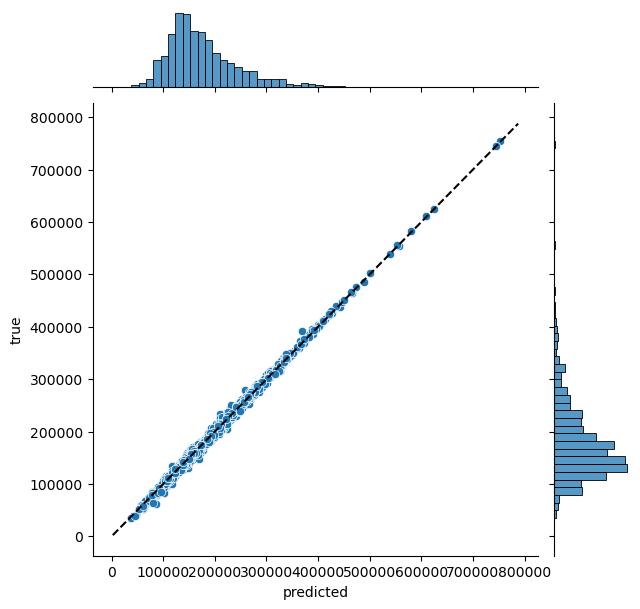

In [ ]:
# Let's visualize predictions on train set
y_pred_train = best_model.predict(X)
g = sns.jointplot(x=y_pred_train,y=y)
g.set_axis_labels(xlabel='predicted',ylabel='true')
x = np.linspace(*g.ax_joint.get_xlim())
g.ax_joint.plot(x, x, '--k')

## <a id='toc1_4_'></a>[Model - Stacking Regressor](#toc0_)

In [72]:
# Collect all estimators from our grid search
best_model = [results[i]['grid_search'].best_estimator_ for i in range(len(results))]
model_name = [results[i]['model'] for i in range(len(results))]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[CV] END .................................................... total time=  22.5s
[CV] END .................................................... total time=  22.3s
[CV] END .................................................... total time=  23.0s
[CV] END .................................................... total time=  23.4s
[CV] END .................................................... total time=   9.6s


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   33.6s finished


{'r2': '0.88 +- 0.03', 'neg_mean_squared_error': '752929255.47 +- 294236861.66', 'neg_mean_absolute_error': '15616.40 +- 1315.66'}


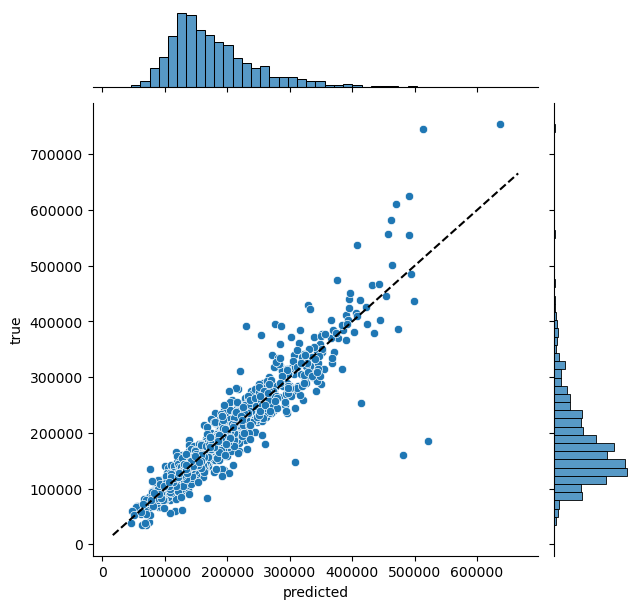

In [73]:
# Here we build a stacking regressor based on previous models
# We choose a ridge regression with built in cross validation as final estimator combining stacked models scores
# We perform cross validation to obtain a better estimate of model performance, then fit on the full train dataset

from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_validate, cross_val_predict

# Define stacking regressor
cv_fold = KFold(n_splits= 5, shuffle=True, random_state=0)

stacking_model = StackingRegressor(
    estimators=[
        (model_name[i],best_model[i]) for i in range(len(results))
    ],
    final_estimator=RidgeCV(),
    cv=KFold(n_splits=5, shuffle=True, random_state=0)
)

# Perform cross validation
scorers = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

cv_results = cross_validate(
    stacking_model, 
    X, 
    y, 
    cv=cv_fold, 
    return_train_score=True,
    scoring=scorers,
    return_estimator=True,
    n_jobs = N_CORES,
    verbose=2
)

y_pred_train = cross_val_predict(stacking_model, X, y, n_jobs=N_CORES, verbose=0)

scores = {
    scorer: (
        f"{np.abs(np.mean(cv_results[f'test_{scorer}'])):.2f} +- "
        f"{np.std(cv_results[f'test_{scorer}']):.2f}"
    )
    for scorer in scorers
}
print(scores)

# Plot cross validated predictions
g = sns.jointplot(x=y_pred_train,y=y)
g.set_axis_labels(xlabel='predicted',ylabel='true')
x = np.linspace(*g.ax_joint.get_xlim())
g.ax_joint.plot(x, x, '--k')
plt.savefig('Figures/cross_val_predict.pdf')

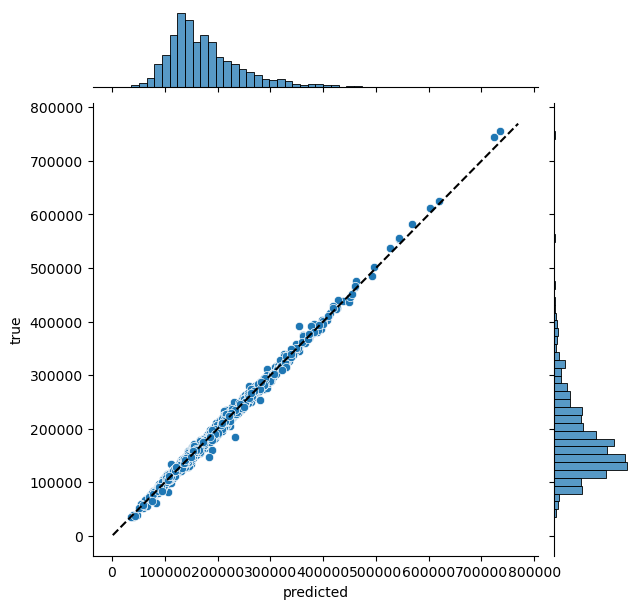

In [60]:
# Fit on the whole dataset and visualize predictions on train set
stacking_model.fit(X,y)
y_pred_train = stacking_model.predict(X)

g = sns.jointplot(x=y_pred_train,y=y)
g.set_axis_labels(xlabel='predicted',ylabel='true')
x = np.linspace(*g.ax_joint.get_xlim())
g.ax_joint.plot(x, x, '--k')

In [ ]:
# Dump the stacking regressor model
import joblib

joblib.dump(stacking_model,"stacking_model.joblib")

['stacking_model.joblib']

## <a id='toc1_5_'></a>[Predict](#toc0_)

In [62]:
# Load chosen model
best_model_filename = "stacking_model.joblib"
df_test_ = pd.read_csv(f"{data_path}test.csv")
best_model = joblib.load(best_model_filename)

In [ ]:
# Predict, convert to df, save csv
y_pred_test = best_model.predict(df_test.values)
ids = df_test_['Id']
df_submission = pd.DataFrame({'Id':ids,
                              'SalePrice':y_pred_test})
df_submission.to_csv("submissionPB_stacking.csv",index=False)
df_submission.head()

,Id,SalePrice
0,1461,120467.434577
1,1462,167814.379754
2,1463,180868.137762
3,1464,198992.994430
4,1465,179833.824515


<Axes: ylabel='Count'>

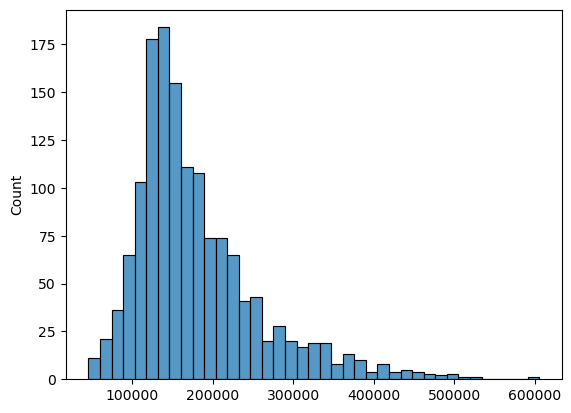

In [ ]:
# Histplot
sns.histplot(best_model.predict(df_test.values))

In [ ]:
# Submit to kaggle
import json
import os

with open("kaggle.json","rb") as f:
    credentials = json.load(f)
credentials

os.environ["KAGGLE_USERNAME"]=credentials["username"]
os.environ["KAGGLE_KEY"]=credentials["key"]

In [69]:
import kaggle

!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submissionPB_stacking.csv -m "Stacking model submission"

100%|██████████████████████████████████████| 33.6k/33.6k [00:00<00:00, 37.4kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques